### label_encoder

In [10]:
import pandas as pd

# 일단 데이터프레임 만들기
df = pd.DataFrame({
    'A' : ['a', 'b', 'c', 'a', 'b'],
    'B' : [1, 2, 3, 1, 0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 일단 LabelEncoder 만들고 A에 있는 걸로 학습해보자.
le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [ ]:
# LabelEncoder가 어떤 고유 값들을 어떤 순서로 숫자에 매핑했는지를 알려줍니다.
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [ ]:
# df에 le_A이름의 컬럼을 추가하고, A컬럼에 있는 값들을 변환해서 넣음
df["le_A"] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [ ]:
# 각 해당하는 값이 어떤걸로 변환됐는지 알려면?
le.transform(['a', 'b'])

array([0, 1])

In [13]:
# 변환한 걸로 바로 fit하는 함수도 있다.
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [14]:
# 역변환을 하고 싶으면?
le.inverse_transform([1,2,2,2])

array(['b', 'c', 'c', 'c'], dtype=object)

### min-max scaling

In [ ]:
# min-max scaling를 확인하기 위해 예시 df만들기
import pandas as pd

df = pd.DataFrame({
    'A' : [10, 20, -10, 0, 25],
    'B' : [1, 2, 3, 1, 0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [17]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성하고, mms를 df 기반으로 학습
mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [19]:
# min, max를 확인해보면?
mms.data_min_, mms.data_max_

(array([-10.,   0.]), array([25.,  3.]))

In [20]:
# transform 시킬라면?
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [21]:
# 역변환
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [22]:
# 이것또한 바로 하나의 함수로 transform한뒤 fit하는게 가능하다!
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

### Standard Scaler

In [ ]:
# df 그대로 사용
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [24]:
from sklearn.preprocessing import StandardScaler

# 이번에도 StandardScaler 만들고 학습시켜보자
ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [ ]:
# 평균, 표준편자
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [ ]:
# transform
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [ ]:
# 변환
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [ ]:
# 역변환
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### Robust Scaler

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 데이터 새롭게 만들기
df = pd.DataFrame({
    'A': [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})

# 다른것들도 비교를 위해 다 세팅
mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [30]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


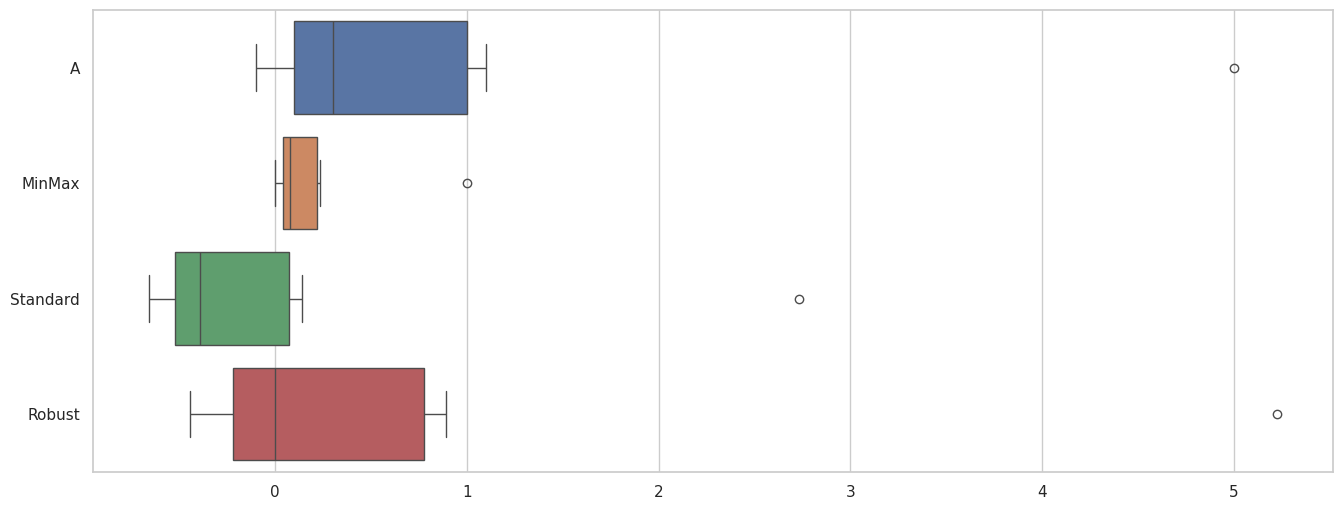

In [31]:
# box_plot으로 시각화해서 비교해보자
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_scaler, orient="h");
